In [ ]:
import pandas as pd
import seaborn as sns
from io import StringIO
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = '''
Fever,Cough,Breath ingissues,Infected
NO,NO,NO,NO
YES,YES,YES,YES
YES,YES,NO,NO
YES,NO,YES,YES
YES,YES,YES,YES
NO,YES,NO,NO
YES,NO,YES,YES
YES,NO,YES,YES
NO,YES,YES,YES
YES,YES,NO,YES
NO,YES,NO,NO
NO,YES,YES,YES
NO,YES,YES,NO
YES,YES,NO,NO
'''

def run(unique: bool):
    df = pd.read_csv(StringIO(data), delimiter=',')
    if unique:
        df = df.drop_duplicates()
    print('Head:')
    df.info()

    print('Data:\n', df) #or print(df.values)
    print('Shape:\n', df.shape)
    print('Describe\n', df.describe())

    df = df.replace({'Fever': {'YES': 1, 'NO': 0}})
    df = df.replace({'Cough': {'YES': 1, 'NO': 0}})
    df['Breath ingissues'] = pd.factorize(df['Breath ingissues'])[0]
    #df = df.replace(to_replace=['YES', 'NO'], value=['1', '0']) #replace all

    X = df.drop('Infected',axis=1).values
    y = df[['Infected']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1) #random_state - Controls the shuffling applied to the data before applying the split.
    #print('y_train', y_train, '\ny_test1', y_test)

    model = tree.DecisionTreeClassifier()
    model.fit(X_train,y_train)

    print('Score:', model.score(X, y))
    y_predict = model.predict(X_test)
    print('Accuracy:', accuracy_score(y_test, y_predict))

    #Validate
    feature_names = ['Fever', 'Cough', 'Breath ingissues']
    values = [0, 0, 0]
    print(dict(zip(feature_names, values)),  'NO Infected:', model.predict([values]))
    values = [0, 1, 0]
    print(dict(zip(feature_names, values)),  'NO Infected:', model.predict([values]))
    values = [1, 1, 0]
    #^YES,YES,NO - Infected: 1 YES and 2 NO
    print(dict(zip(feature_names, values)),  'MAYBE Infected:', model.predict([values]))
    values = [0, 1, 1]
    #^NO,YES,YES - Infected: 2 YES and 1 NO
    print(dict(zip(feature_names, values)),  'MAYBE Infected:', model.predict([values]))
    values = [0, 0, 1]
    #^NO,NO,YES - None
    #^NO,NO,\w+ - Infected: 1 NO
    #^NO,\w+,YES - Infected: 2 YES and 1 NO
    #^\w+,NO,YES - Infected: 3 YES
    print(dict(zip(feature_names, values)),  'MAYBE Infected:', model.predict([values]))
    values = [1, 1, 1]
    print(dict(zip(feature_names, values)),  'YES Infected:', model.predict([values]))
    values = [1, 0, 1]
    print(dict(zip(feature_names, values)),  'YES Infected:', model.predict([values]))

    return df, model

def visualize(df):
  f, axs = plt.subplots(1,3,
                      figsize=(9,5),
                      sharey=True)
  sns.countplot(x ='Fever', hue = "Infected", data = df, ax=axs[0])
  sns.countplot(x ='Cough', hue = "Infected", data = df, ax=axs[1])
  sns.countplot(x ='Breath ingissues', hue = "Infected", data = df, ax=axs[2])
  f.tight_layout()
  #plt.show()

Head:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Fever             14 non-null     object
 1   Cough             14 non-null     object
 2   Breath ingissues  14 non-null     object
 3   Infected          14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes
Data:
    Fever Cough Breath ingissues Infected
0     NO    NO               NO       NO
1    YES   YES              YES      YES
2    YES   YES               NO       NO
3    YES    NO              YES      YES
4    YES   YES              YES      YES
5     NO   YES               NO       NO
6    YES    NO              YES      YES
7    YES    NO              YES      YES
8     NO   YES              YES      YES
9    YES   YES               NO      YES
10    NO   YES               NO       NO
11    NO   YES              YES      YES
12    NO   YES              YES

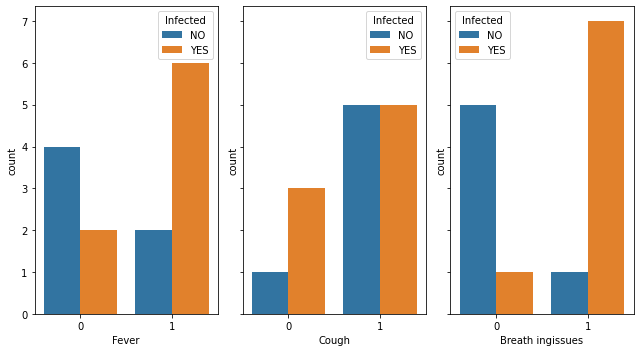

In [ ]:
# Without removing duplicates
#     Score: 0.8571428571428571
#     Accuracy: 1.0
'''
{'Fever': 0, 'Cough': 0, 'Breath ingissues': 0} NO Infected: ['NO']
{'Fever': 0, 'Cough': 1, 'Breath ingissues': 0} NO Infected: ['NO']
{'Fever': 1, 'Cough': 1, 'Breath ingissues': 0} MAYBE Infected: ['NO']   - Infected: 1 YES and 2 NO
{'Fever': 0, 'Cough': 1, 'Breath ingissues': 1} MAYBE Infected: ['YES']  - Infected: 2 YES and 1 NO
{'Fever': 0, 'Cough': 0, 'Breath ingissues': 1} MAYBE Infected: ['YES']  - Infected: 5 YES and 2 NO
{'Fever': 1, 'Cough': 1, 'Breath ingissues': 1} YES Infected: ['YES']
{'Fever': 1, 'Cough': 0, 'Breath ingissues': 1} YES Infected: ['YES']
'''

df1, model1 = run(False)
visualize(df1)

Head:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 12
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Fever             8 non-null      object
 1   Cough             8 non-null      object
 2   Breath ingissues  8 non-null      object
 3   Infected          8 non-null      object
dtypes: object(4)
memory usage: 320.0+ bytes
Data:
    Fever Cough Breath ingissues Infected
0     NO    NO               NO       NO
1    YES   YES              YES      YES
2    YES   YES               NO       NO
3    YES    NO              YES      YES
5     NO   YES               NO       NO
8     NO   YES              YES      YES
9    YES   YES               NO      YES
12    NO   YES              YES       NO
Shape:
 (8, 4)
Describe
        Fever Cough Breath ingissues Infected
count      8     8                8        8
unique     2     2                2        2
top       NO   YES               NO 

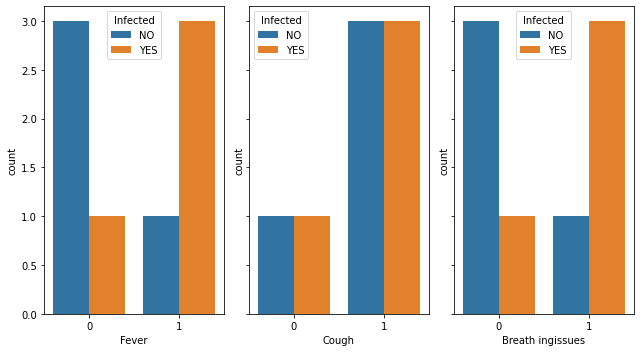

In [ ]:
# Clean duplicate rows
#     Score: 0.75
#     Accuracy: 0.3333333333333333
'''
{'Fever': 0, 'Cough': 0, 'Breath ingissues': 0} NO Infected: ['NO']
{'Fever': 0, 'Cough': 1, 'Breath ingissues': 0} NO Infected: ['NO']
{'Fever': 1, 'Cough': 1, 'Breath ingissues': 0} MAYBE Infected: ['YES'] - NOW YES (before NO)
{'Fever': 0, 'Cough': 1, 'Breath ingissues': 1} MAYBE Infected: ['YES']
{'Fever': 0, 'Cough': 0, 'Breath ingissues': 1} MAYBE Infected: ['YES']
{'Fever': 1, 'Cough': 1, 'Breath ingissues': 1} YES Infected: ['YES']
{'Fever': 1, 'Cough': 0, 'Breath ingissues': 1} YES Infected: ['YES']
'''

df2, model2 = run(True)
visualize(df2)

Model1 visualization: [Text(0.5, 0.8333333333333334, 'X[2] <= 0.5\ngini = 0.494\nsamples = 9\nvalue = [4, 5]\nclass = y[1]'), Text(0.25, 0.5, 'X[0] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = y[0]'), Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = y[0]'), Text(0.375, 0.16666666666666666, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = y[0]'), Text(0.75, 0.5, 'X[0] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]\nclass = y[1]'), Text(0.625, 0.16666666666666666, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]\nclass = y[1]'), Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = y[1]')]
Model2 visualization: [Text(0.6, 0.8333333333333334, 'X[0] <= 0.5\ngini = 0.48\nsamples = 5\nvalue = [2, 3]\nclass = y[1]'), Text(0.4, 0.5, 'X[2] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = y[0]'), Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = y[0]'), Text(0.6, 0.16666666666666666

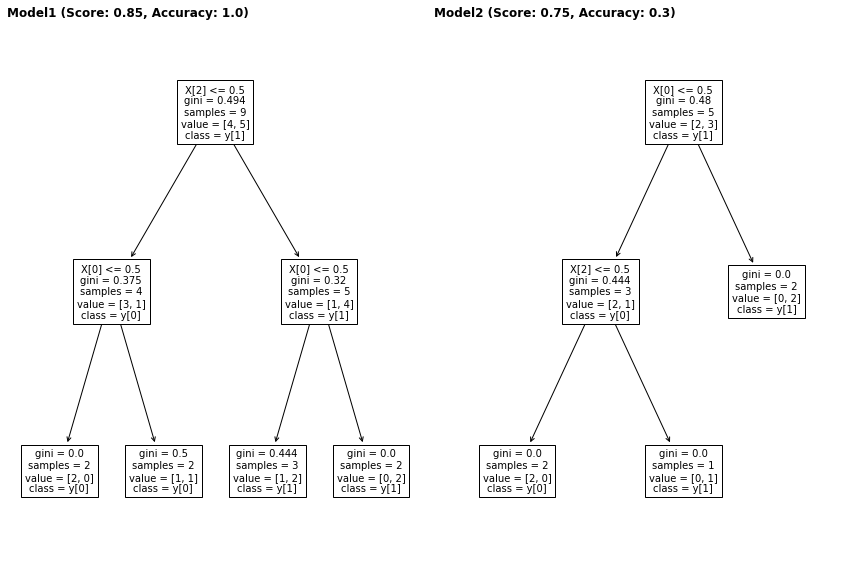

In [ ]:
# Conclusion
f, axs = plt.subplots(1,2,
                      figsize=(12, 8))
print('Model1 visualization:', tree.plot_tree(model1, class_names=True, fontsize=10, ax=axs[0]))
print('Model2 visualization:', tree.plot_tree(model2, class_names=True, fontsize=10, ax=axs[1]))
axs[0].set_title('Model1 (Score: 0.85, Accuracy: 1.0)', loc='left', fontweight='bold')
axs[1].set_title('Model2 (Score: 0.75, Accuracy: 0.3)', loc='left', fontweight='bold')
f.tight_layout()

